# Introduction to Word Embeddings

In this example we we explore some of the basics of word embeddings by downloading a pretrained set of word vectors.

The example is based on the [Basics of Using Pre-Trained GloVe Vectors in Python blog from Analytics Vidhya](https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db).

In [1]:
import os
import numpy as np
from scipy import spatial
from sklearn.manifold import TSNE

## Load the Embeddings

You will first need to download [GloVe vectors from the Stanford Web page](https://nlp.stanford.edu/projects/glove/). 

As you will see, there are various sizes of feature vectors that were trained on different sized corpora. For this example, we will download the "smallest" set of vectors which were trained on 6 billion tokens -- which are labeled as `glove.6B`.

1. Download the data from [this link](http://nlp.stanford.edu/data/glove.6B.zip)
2. Extract the downloaded ZIP file to the folder containing this notebook, so that you have a `glove.6B` folder at the same level as the notebook.

You will see that these are 4 different files in the folder -- tagged with the prefixes `50d`, `100d`, `200d`, and `300d`. These correspond to the embedding vector dimensions. The smaller vector sizes will take up much less memory when training and using a model, but will have less representational capacity. You should try different vector sizes below.

In [2]:
# Define the GloVe vectors to load
glove_file = os.path.join("glove.6B", "glove.6B.100d.txt")

# Create a dictionary mapping each word to an index (this is basically one-hot encoding)
embeddings_dict = {}
with open(glove_file, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
print("There are {} words in the dictionary".format(len(embeddings_dict)))

# Get and display the embedding vector for a word
word = "dog"
vec = embeddings_dict[word]
print("\nVector for \"{}\":".format(word))
print(vec)
print("Vector length: {}".format(len(vec)))

There are 400000 words in the dictionary

Vector for "dog":
[ 0.30817    0.30938    0.52803   -0.92543   -0.73671    0.63475
  0.44197    0.10262   -0.09142   -0.56607   -0.5327     0.2013
  0.7704    -0.13983    0.13727    1.1128     0.89301   -0.17869
 -0.0019722  0.57289    0.59479    0.50428   -0.28991   -1.3491
  0.42756    1.2748    -1.1613    -0.41084    0.042804   0.54866
  0.18897    0.3759     0.58035    0.66975    0.81156    0.93864
 -0.51005   -0.070079   0.82819   -0.35346    0.21086   -0.24412
 -0.16554   -0.78358   -0.48482    0.38968   -0.86356   -0.016391
  0.31984   -0.49246   -0.069363   0.018869  -0.098286   1.3126
 -0.12116   -1.2399    -0.091429   0.35294    0.64645    0.089642
  0.70294    1.1244     0.38639    0.52084    0.98787    0.79952
 -0.34625    0.14095    0.80167    0.20987   -0.86007   -0.15308
  0.074523   0.40816    0.019208   0.51587   -0.34428   -0.24525
 -0.77984    0.27425    0.22418    0.20164    0.017431  -0.014697
 -1.0235    -0.39695   -0.0056

## Perform Arithmetic on Word Vectors

A key benefit of computing these lower-dimensional word embeddings is that similar words should have been trained to be near each other in vector space. 

We can evaluate how well our word vectors work by displaying a few of the closest words to the vector, using the Euclidean distance between embedding vectors as the metric.

You can also perform arithmetic (addition / subtraction) on word vectors, which is always a neat demonstration of the power of word embeddings.

In [3]:
def find_closest_embeddings(vec, N):
    """ 
    Finds the `N` closest words to a specific word vector `vec` 
    using the Euclidean distance as a metric
    """
    sorted_dict = sorted(embeddings_dict.keys(), 
        key=lambda word: spatial.distance.euclidean(embeddings_dict[word], vec))
    return sorted_dict[1:N+1]


vec = embeddings_dict["king"]
print(find_closest_embeddings(vec,3))

vec = embeddings_dict["king"] + embeddings_dict["woman"] - embeddings_dict["man"]
print(find_closest_embeddings(vec,3))

vec = embeddings_dict["south"] - embeddings_dict["down"] + embeddings_dict["up"]
print(find_closest_embeddings(vec,3))

['prince', 'queen', 'monarch']
['queen', 'monarch', 'throne']
['north', 'west', 'east']


## Visualize the Word Vectors

Word vectors are high-dimensional -- depending on which of the `glove.6B` vectors you chose, the vectors will range between 50- and 300-dimensional, which makes them impossible to visually interpret.

There are various dimensionality reduction techniques to help us visualize word embedding vectors. Below we will use the [t-distributed Stochastic Neighbor Embedding (t-SNE) in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

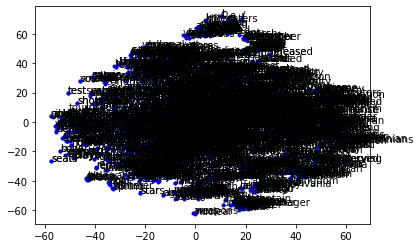

In [4]:
# Import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

# Use t-SNE to get a 2-D representation of the vectors
tsne = TSNE(n_components=2, random_state=0)
words = list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
N_VIS = 2000
X_tsne = tsne.fit_transform(vectors[:N_VIS]) # Only using the first N_VIS words

# Plot the vectors with their corresponding words next to them. 
# Note that you will need to do some zooming to make sense of the plot, 
# which is enabled in Jupyter notebooks by the `mpld3` library.
# Hover your cursor over the lower left of the plot to access the view controls.
plt.plot(X_tsne[:,0], X_tsne[:,1], "b.")
for label, x, y in zip(words, X_tsne[:, 0].tolist(), X_tsne[:, 1].tolist()):
    plt.text(x, y, label)
plt.show()